In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:

class Image (object):
    def __init__(self, path):
        self.path = path
        self.bgr_img = None 
        self.gray_img = None
        self.rgb_img = None
    
    def read_image(self, return_img = False):
        self.bgr_img = cv2.imread(self.path)
        if return_img:
            return self.bgr_img
        
    def rgb(self, return_img = False):
        self.rgb_img = cv2.cvtColor(self.bgr_img, cv2.COLOR_BGR2RGB)
        if return_img:
            return self.rgb_img
        
    def gray(self, return_img = False):
        self.gray_img = cv2.cvtColor(self.bgr_img, cv2.COLOR_BGR2GRAY)
        if return_img:
            return self.gray_img
        
    def show(self, img, title='image'):
        plt.figure(figsize=[20,10])
        if len(img.shape)!=3 :
            plt.imshow(img,cmap='gray')
        else:
            plt.imshow(img)

        plt.title(title)
        plt.show(img)
        
        
    def show_all(self,image_list,title_list):
        plt.figure(figsize=[20,10])
        assert len(image_list) == len(title_list),"Houston we've got a problem"
        N=len(image_list)
        for index,(img, title) in enumerate(zip(image_list, title_list)):
          plt.subplot(1, N, index+1)
          if len(img.shape) !=3:
            plt.imshow(img ,cmap='gray')
          else:
            plt.imshow(img)
          plt.title(title)
        plt.show()
        

# Test 1

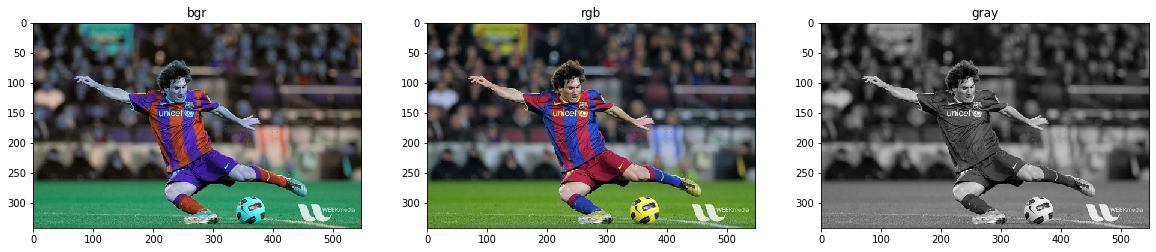

In [3]:
img = Image('messi.jpg')
bgr = img.read_image(return_img=True)
rgb = img.rgb(return_img=True)
gray = img.gray(return_img=True)
img.show_all([bgr,rgb,gray],['bgr','rgb','gray'])

In [4]:
def normalizing(img):
    return img/np.max(np.abs(img))

In [5]:
def convolve2d(image, kernel):
    kernel = np.flip(np.flip(kernel, axis = 1), axis = 0)
    convolved_matrix = np.zeros_like(image)
    mask_size = kernel.shape[0]
    image = normalizing(image)
    padding_size = int((mask_size - 1)/2)
    image_cpy = np.zeros([2*padding_size + image.shape[0], 2*padding_size + image.shape[1]]) #a copy of the image to work on (used for padding)
    image_cpy[padding_size:-padding_size, padding_size: -padding_size] = image
    
    for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                convolved_matrix[y, x] = (kernel * image_cpy[y:y + mask_size, x:x + mask_size]).sum()
    return convolved_matrix
    
    
    

# test 2

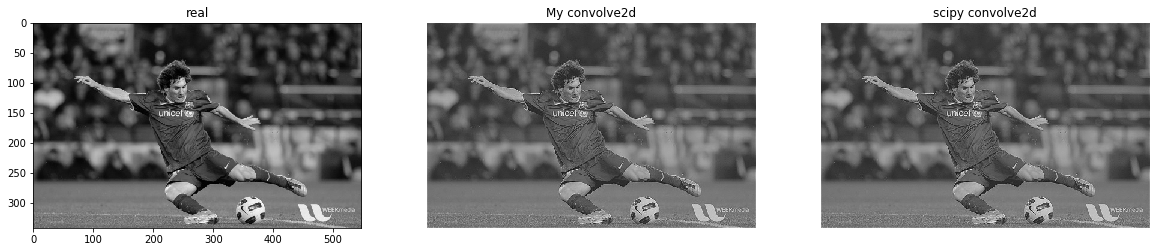

In [6]:
kernel = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]]) / 4
image_equalized = gray / np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized, kernel)
plt.figure(figsize=[20, 10])
plt.subplot(131)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convolve2d')
plt.axis('off')
import scipy.signal

image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('scipy convolve2d')
plt.axis('off')
plt.show()

# Sobel operator

In [7]:
ddepth = cv2.CV_64F
dx = 1
dy = 0
vertical_sobel = cv2.Sobel(gray, ddepth, dx, dy)

In [8]:
ddepth = cv2.CV_64F
dx = 0
dy = 1
horizontal_sobel = cv2.Sobel(gray, ddepth, dx, dy)

In [9]:
ddepth = cv2.CV_64F
dx = 1
dy = 1
sobel_x_y = cv2.sqrt(cv2.addWeighted(cv2.pow(vertical_sobel, 2.0), 1.0, cv2.pow(horizontal_sobel,
2.0), 1.0, 0.0))

Text(0.5, 1.0, 'sobel intensity')

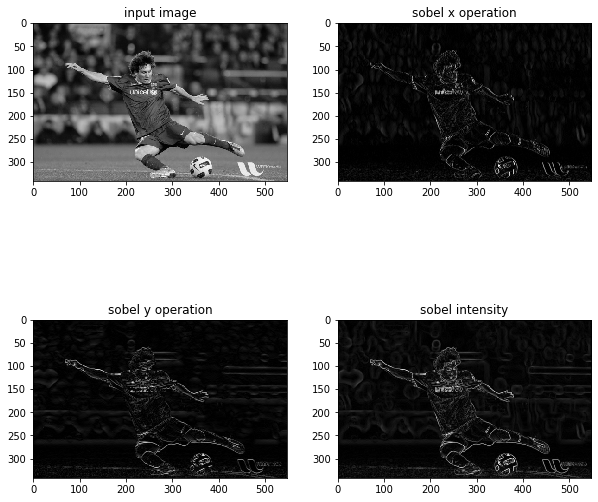

In [10]:
plt.figure(figsize=[10, 10])
plt.subplot(221)
plt.imshow(gray, cmap = 'gray')
plt.title('input image')

plt.subplot(222)
plt.imshow(abs(vertical_sobel), cmap = 'gray')
plt.title('sobel x operation')


plt.subplot(2,2,3)
plt.imshow(abs(horizontal_sobel), cmap = 'gray')
plt.title('sobel y operation')

plt.subplot(2, 2, 4)
plt.imshow(abs(sobel_x_y), cmap = 'gray')
plt.title('sobel intensity')

# Canny edges

Text(0.5, 1.0, 'Canny 150/250')

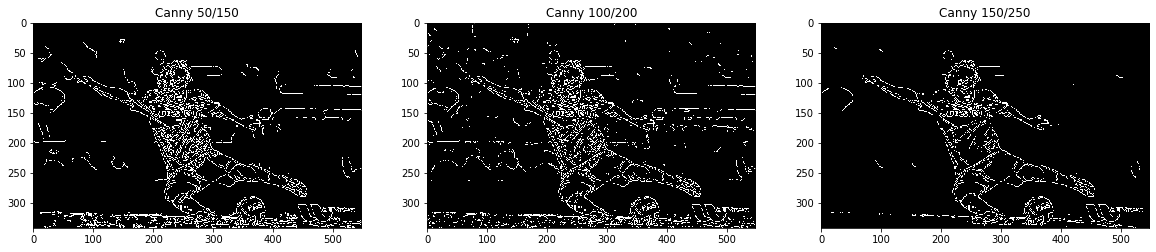

In [11]:
plt.figure(figsize=[20, 20])
edges = cv2.Canny(gray, 50, 150)
plt.subplot(131)
plt.imshow(edges, cmap = 'gray')
plt.title('Canny 50/150')

edges200 = cv2.Canny(gray, 100, 100)
plt.subplot(132)
plt.imshow(edges200, cmap = 'gray')
plt.title('Canny 100/200')

edges250 = cv2.Canny(gray, 150, 200)
plt.subplot(133)
plt.imshow(edges250, cmap = 'gray')
plt.title('Canny 150/250')

# Differences between thresholds on Canny:

The upper threshold is used to identify the pixel with higher intensity than the threshold value and classify them as final edge.

The lower threshold is used to identify the pixel with lower intensity than the threshold value and classify them as non-relevant.

# Draw contours:

In [12]:
track = cv2.imread('track.jpg')
track_gray = cv2.cvtColor(track, cv2.COLOR_BGR2GRAY)
track_cpy = track.copy()

Text(0.5, 1.0, 'draw contours')

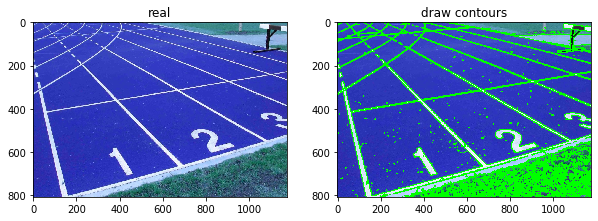

In [14]:
track_edges = cv2.Canny(track_gray, 100,200)
contours, hierarchy = cv2.findContours(track_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(track_cpy, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(track)
plt.title('real')
plt.subplot(122)
plt.imshow(track_cpy)
plt.title('draw contours')